<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Japan_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='crimson'>**Milestone #1 - Data Preparation**</font>
GOAL: The main goal of this milestone is to set up your environment, install the required packages, load the data and do some basic exploratory data analysis.

In [1]:
# Loading libraries
import pandas as pd                       # for data manipulation and analysis
import matplotlib.pyplot as plt           # for 2D plotting
import seaborn as sns                     # for statistical data visualization
sns.set(style='whitegrid')                # Set visual style for seaborn
import folium                             # for data visualization on an interactive leaflet map

import warnings
warnings.simplefilter("ignore")

In [2]:
# Getting started
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data using pandas

df_global = pd.read_csv("/content/drive/MyDrive/Analyzing_Pandemic_Responses/data/OxCGRT_compact_national_v1.csv")

In [4]:
# print info for national dataset
df_global.info()
print()
df_global.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [7]:
# Filter for countries of interest USA, Japan and South Africa
countries = ['Japan', 'United States']
df = df_global[df_global['CountryName'].isin(countries)]
df.shape

(2192, 56)

In [12]:
# Filter for Japan (CountryCode = "JPN") and national-level data (Jurisdiction = "NAT_TOTAL")
df_japan = df_global[(df_global['CountryCode'] == 'JPN') & (df_global['Jurisdiction'] == 'NAT_TOTAL')].copy()

In [14]:
# inspect date column
df_japan.info()
df_japan.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 93160 to 94255
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   CountryName                                                                      1096 non-null   object 
 1   CountryCode                                                                      1096 non-null   object 
 2   RegionName                                                                       0 non-null      float64
 3   RegionCode                                                                       0 non-null      float64
 4   Jurisdiction                                                                     1096 non-null   object 
 5   Date                                                                             1096 non-null   int64  
 6   C1M_Scho

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
93160,Japan,JPN,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93161,Japan,JPN,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93162,Japan,JPN,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93163,Japan,JPN,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93164,Japan,JPN,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [15]:
# Convert date column to datetime and sort by date
df_japan['Date'] = pd.to_datetime(df_japan['Date'], format="%Y%m%d")
df_japan = df_japan.sort_values('Date')
df_japan['Date'].head()

,Date
93160,2020-01-01
93161,2020-01-02
93162,2020-01-03
93163,2020-01-04
93164,2020-01-05


In [27]:
# Timeline of data
print(df_japan['Date'].min())
print(df_japan['Date'].max())

2020-01-01 00:00:00
2022-12-31 00:00:00


In [21]:
# Calculate daily changes in confirmed cases
df_japan['DailyCases'] = df_japan['ConfirmedCases'].diff().fillna(0).clip(lower=0)
df_japan['DailyCases'].describe()

,DailyCases
count,1096.000000
mean,26673.975365
std,49378.592524
min,0.000000
25%,436.000000
50%,2504.000000
75%,32392.250000
max,260999.000000


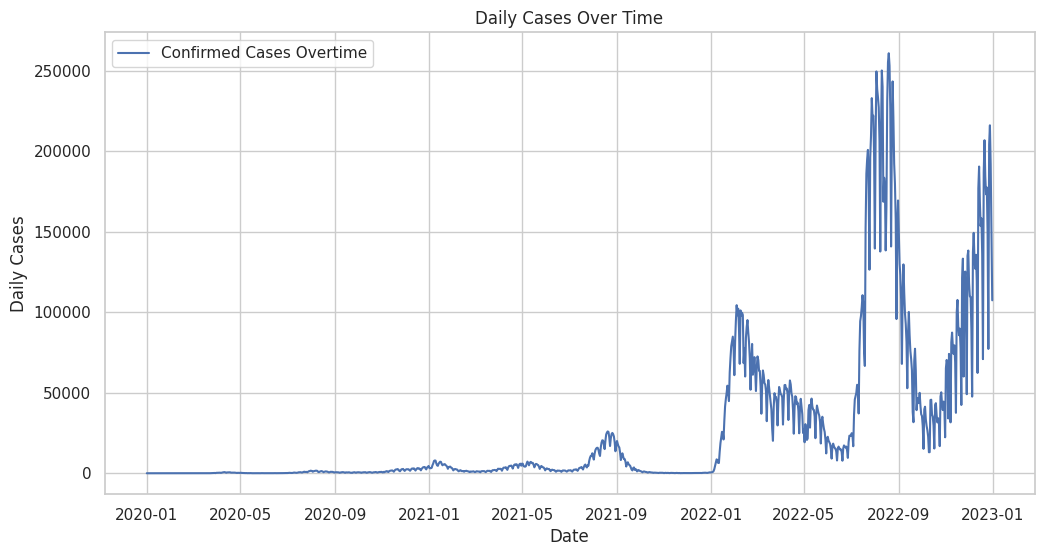

In [22]:
# Visualisation of daily changes of confirmed cases overtime
plt.figure(figsize=(12, 6))
plt.plot(df_japan['Date'], df_japan['DailyCases'], label='Confirmed Cases Overtime')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.title('Daily Cases Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Calculate daily changes in confirmed deaths
df_japan['DailyDeaths'] = df_japan['ConfirmedDeaths'].diff().fillna(0).clip(lower=0)
df_japan['DailyDeaths'].describe()

,DailyDeaths
count,1096.000000
mean,52.266423
std,70.754887
min,0.000000
25%,6.000000
50%,25.000000
75%,65.000000
max,420.000000


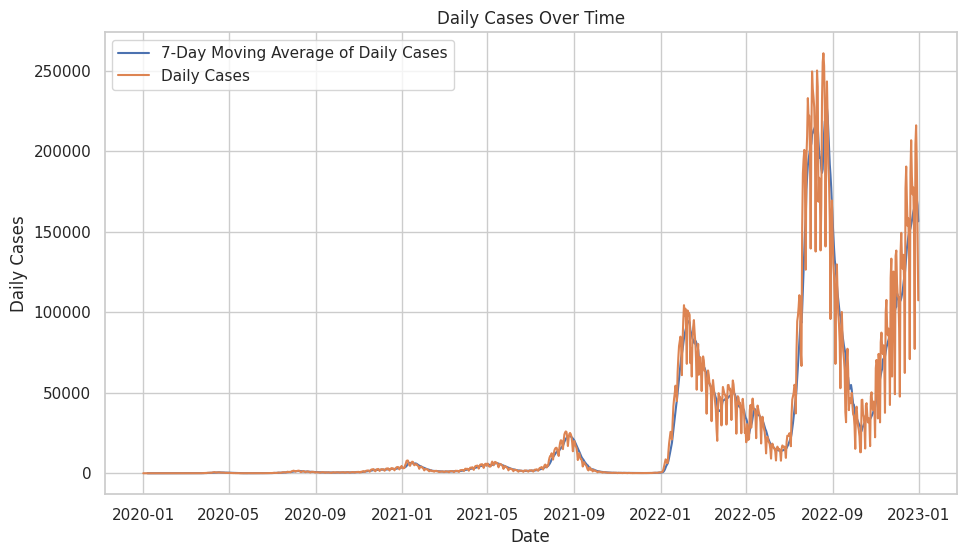

In [35]:
# Calculate 7-day moving averages
df_japan['Cases_7dayAvg'] = df_japan['DailyCases'].rolling(7).mean()

# Visualisation showing the 7 day moviang averages
plt.figure(figsize=(11, 6))
plt.plot(df_japan['Date'], df_japan['Cases_7dayAvg'], label='7-Day Moving Average of Daily Cases')
plt.plot(df_japan['Date'], df_japan['DailyCases'], label='Daily Cases')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.title('Daily Cases Over Time')
plt.legend()
plt.grid(True)
plt.show()

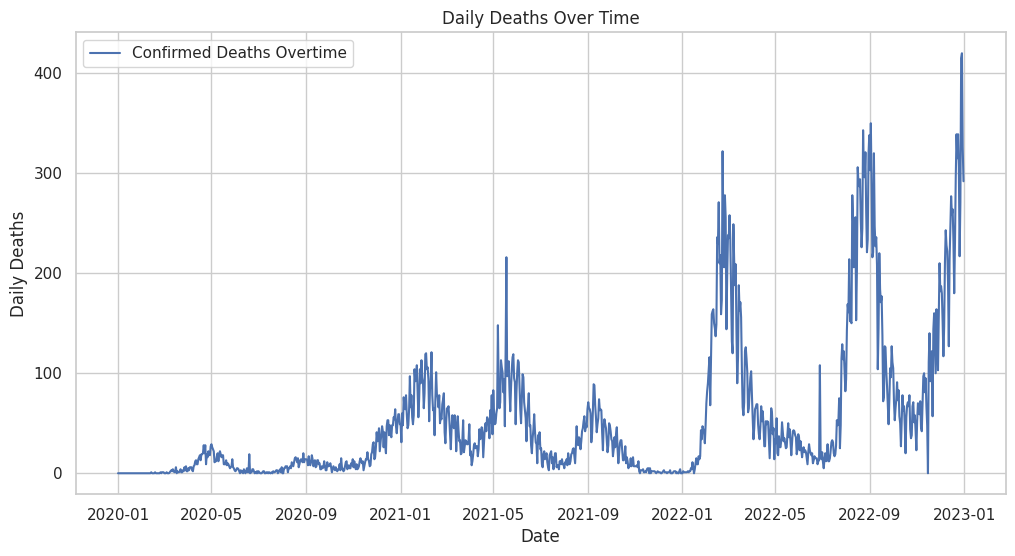

In [33]:
# Visualisation of daily changes of confirmed deaths overtime
plt.figure(figsize=(12, 6))
plt.plot(df_japan['Date'], df_japan['DailyDeaths'], label='Confirmed Deaths Overtime')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('Daily Deaths Over Time')
plt.legend()
plt.grid(True)
plt.show()

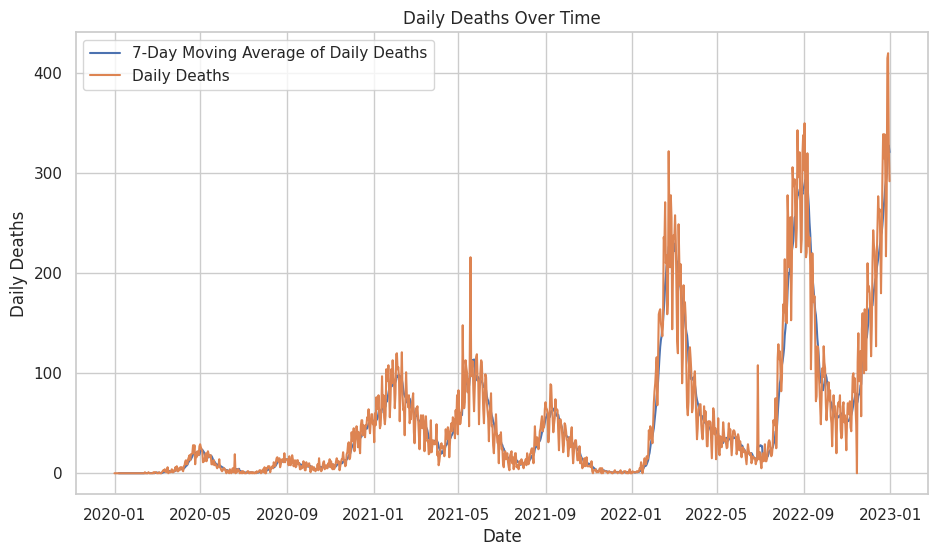

In [34]:
# Calculate 7 day moving averges
df_japan['Deaths_7dayAvg'] = df_japan['DailyDeaths'].rolling(7).mean()
df_japan['Deaths_7dayAvg'].describe()

# Visualisation showing the 7 day moviang averages
plt.figure(figsize=(11, 6))
plt.plot(df_japan['Date'], df_japan['Deaths_7dayAvg'], label='7-Day Moving Average of Daily Deaths')
plt.plot(df_japan['Date'], df_japan['DailyDeaths'], label='Daily Deaths')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('Daily Deaths Over Time')
plt.legend()
plt.grid(True)

In [38]:
# Check columns (focus on policy and outcome variables)
print(df_japan[['Date', 'H6M_Facial Coverings', 'ConfirmedCases', 'ConfirmedDeaths']].head())

            Date  H6M_Facial Coverings  ConfirmedCases  ConfirmedDeaths
93160 2020-01-01                   0.0             0.0              0.0
93161 2020-01-02                   0.0             0.0              0.0
93162 2020-01-03                   0.0             0.0              0.0
93163 2020-01-04                   0.0             0.0              0.0
93164 2020-01-05                   0.0             0.0              0.0


CountryName
Japan            0.945255
United States    2.658759
Name: H6M_Facial Coverings, dtype: float64


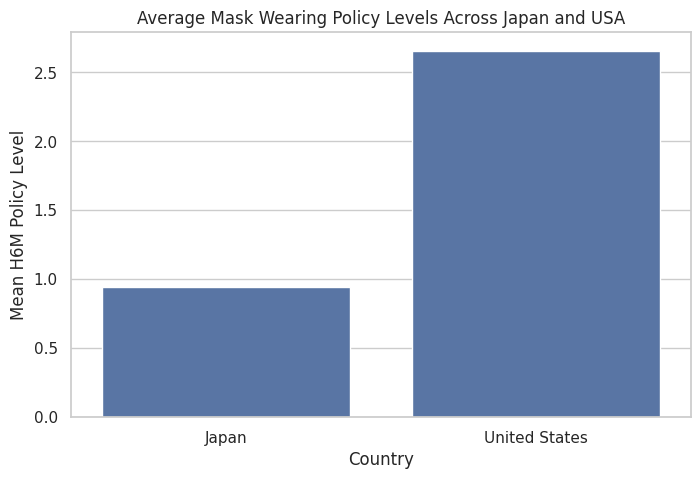

In [43]:
# Average mask wearing policy levels across Japan and USA

# data preparation
df_japan_usa = df_global[(df_global['CountryName'].isin(['Japan', 'United States'])) & (df_global['Jurisdiction'] == 'NAT_TOTAL')]
df_japan_usa['Date'] = pd.to_datetime(df_japan_usa['Date'], format="%Y%m%d")
df_japan_usa = df_japan_usa.sort_values('Date')
df_japan_usa = df_japan_usa.sort_values('Date')
df_japan_usa['DailyCases'] = df_japan_usa['ConfirmedCases'].diff().fillna(0).clip(lower=0)
df_japan_usa['Cases_7dayAvg'] = df_japan_usa['DailyCases'].rolling(7).mean()
df_japan_usa['DailyDeaths'] = df_japan_usa['ConfirmedDeaths'].diff().fillna(0).clip(lower=0)
df_japan_usa['Deaths_7dayAvg'] = df_japan_usa['DailyDeaths'].rolling(7).mean()

# Group by country and compute mean values
avg_mask = df_japan_usa.groupby('CountryName')['H6M_Facial Coverings'].mean()
print(avg_mask)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_mask.index, y=avg_mask.values)
plt.title('Average Mask Wearing Policy Levels Across Japan and USA')
plt.ylabel('Mean H6M Policy Level')
plt.xlabel('Country')
plt.show()

CountryName
Japan            2.631387
United States    3.017336
Name: H7_Vaccination policy, dtype: float64


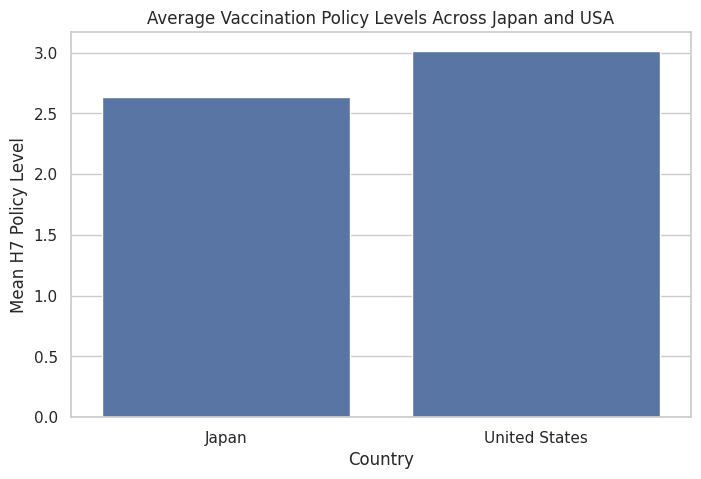

In [45]:
# Average vaccination policy levels across Japan and USA
# Group by country and compute mean values
avg_vac = df_japan_usa.groupby('CountryName')['H7_Vaccination policy'].mean()
print(avg_vac)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_vac.index, y=avg_vac.values)
plt.title('Average Vaccination Policy Levels Across Japan and USA')
plt.ylabel('Mean H7 Policy Level')
plt.xlabel('Country')
plt.show()


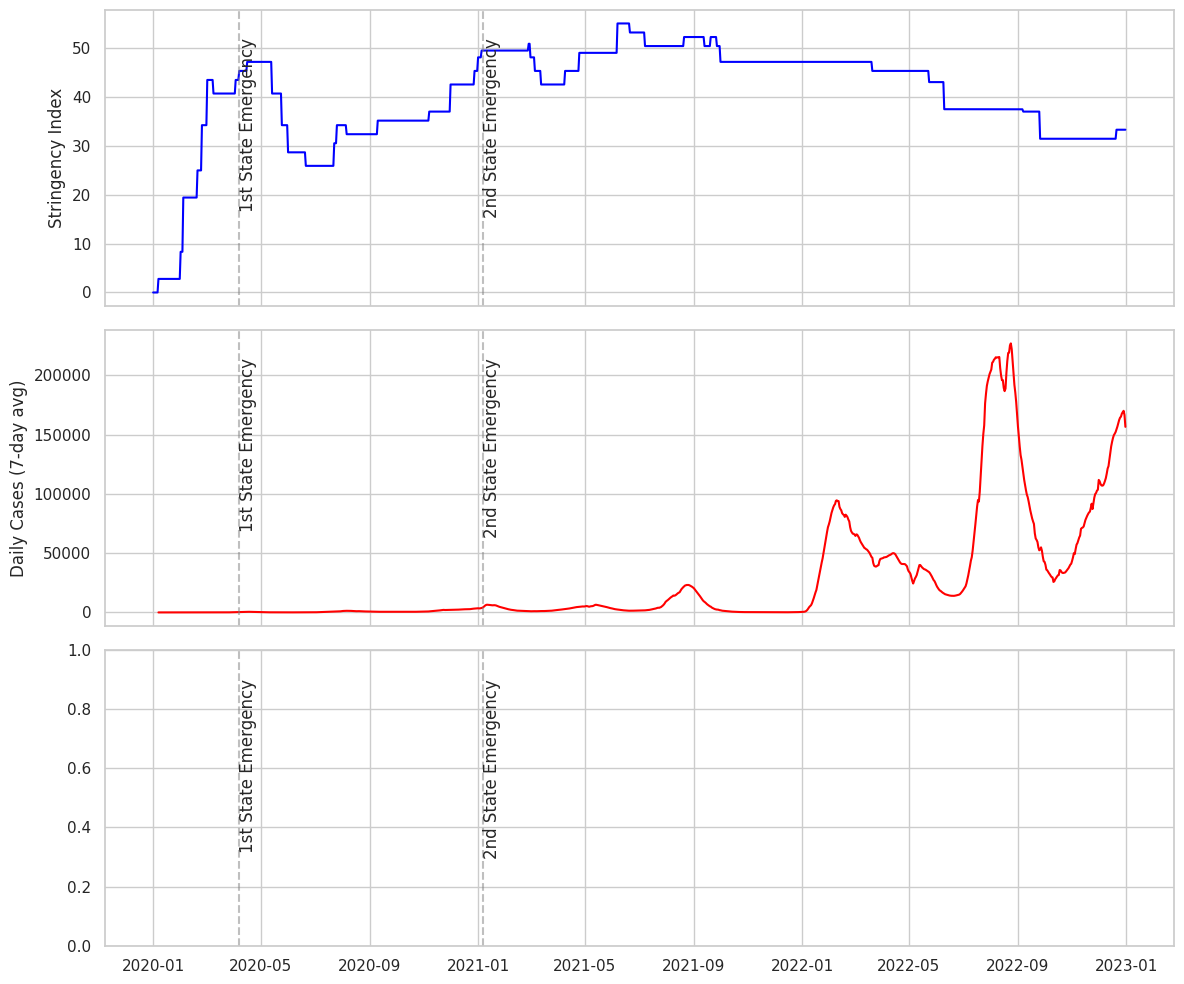

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Policy Strictness
ax[0].plot(df_japan['Date'], df_japan['StringencyIndex_Average'], color='blue')
ax[0].set_ylabel('Stringency Index')

# Cases
ax[1].plot(df_japan['Date'], df_japan['Cases_7dayAvg'], color='red')
ax[1].set_ylabel('Daily Cases (7-day avg)')

# Highlight policy phases
for date, event in [(pd.to_datetime('2020-04-07'), '1st State Emergency'),
                    (pd.to_datetime('2021-01-07'), '2nd State Emergency')]:
    for a in ax:
        a.axvline(date, color='gray', linestyle='--', alpha=0.5)
        a.text(date, a.get_ylim()[1]*0.9, event, rotation=90, va='top')

plt.tight_layout()
plt.show()

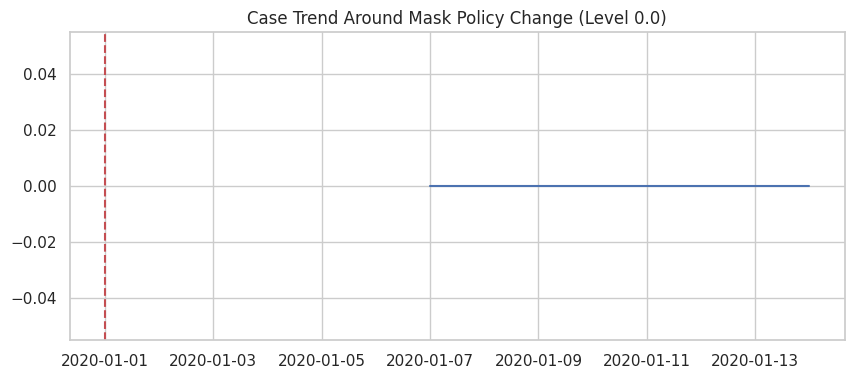

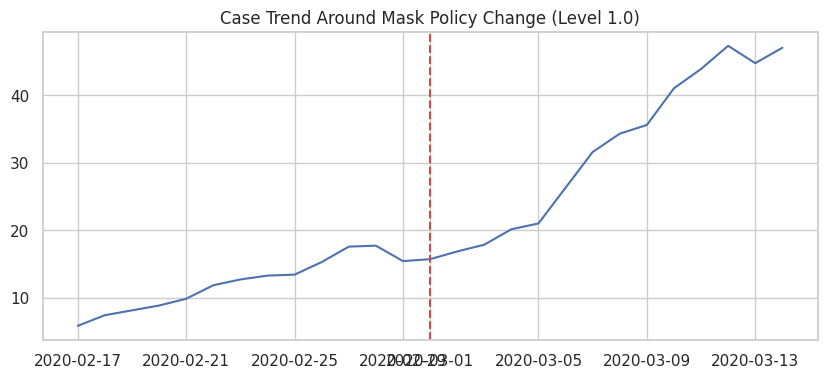

In [39]:
# Compare case growth before/after mask mandates
mask_changes = df_japan[df_japan['H6M_Facial Coverings'].diff() != 0]

for i, row in mask_changes.iterrows():
    period = df_japan[(df_japan['Date'] > row['Date'] - pd.Timedelta(days=14)) &
                     (df_japan['Date'] < row['Date'] + pd.Timedelta(days=14))]

    plt.figure(figsize=(10, 4))
    plt.plot(period['Date'], period['Cases_7dayAvg'])
    plt.axvline(row['Date'], color='r', linestyle='--')
    plt.title(f"Case Trend Around Mask Policy Change (Level {row['H6M_Facial Coverings']})")
    plt.show()

In [ ]:
# Printing data info
data_vaccines_national.info()
data_vaccines_national.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Columns: 226 entries, CountryName to V4_Notes
dtypes: float64(213), int64(4), object(9)
memory usage: 349.6+ MB


,CountryName,CountryCode,Jurisdiction,Date,V1_Vaccine Prioritisation (summary),V1_0-4 yrs infants,V1_5-15 yrs young people,V1_Airport/Border/Airline Staff,V1_At Risk 16-19 yrs,V1_At Risk 20-24 yrs,...,V4_People living with a vulnerable/shielding person or other priority group,V4_Police/ first responders,V4_Pregnant people,V4_Primary and secondary school students,V4_Refugees/migrants,V4_Religious/Spiritual Leaders,V4_Residents in an elderly care home,V4_Staff working in an elderly care home,V4_Tertiary education students,V4_Notes
0,Aruba,ABW,NAT_TOTAL,20200101,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,NAT_TOTAL,20200102,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,NAT_TOTAL,20200103,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,NAT_TOTAL,20200104,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,NAT_TOTAL,20200105,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# summary statistics
data_vaccines_national.describe()

,Date,V1_Vaccine Prioritisation (summary),V1_0-4 yrs infants,V1_5-15 yrs young people,V1_Airport/Border/Airline Staff,V1_At Risk 16-19 yrs,V1_At Risk 20-24 yrs,V1_At Risk 25-29 yrs,V1_At Risk 30-34 yrs,V1_At Risk 35-39 yrs,...,"V4_Other 'high contact' professions/groups (taxi drivers, security guards)",V4_People living with a vulnerable/shielding person or other priority group,V4_Police/ first responders,V4_Pregnant people,V4_Primary and secondary school students,V4_Refugees/migrants,V4_Religious/Spiritual Leaders,V4_Residents in an elderly care home,V4_Staff working in an elderly care home,V4_Tertiary education students
count,2.027600e+05,202760.000000,132.0,1474.000000,7642.000000,6069.000000,6492.000000,6492.000000,6537.000000,6537.000000,...,44863.000000,18735.000000,61333.000000,28192.0,13209.000000,5343.0,10814.000000,51708.0,52011.000000,21737.000000
mean,2.021066e+07,1.119999,5.0,7.695387,3.060848,4.457736,4.323783,4.273259,4.162307,4.120698,...,0.137664,0.011903,0.095479,0.0,0.204103,0.0,0.057888,0.0,0.129357,0.258959
std,8.174621e+03,0.915583,0.0,6.226230,2.552952,3.611452,3.381040,3.220812,2.978010,2.849224,...,0.344550,0.108452,0.293878,0.0,0.403060,0.0,0.233542,0.0,0.335598,0.438073
min,2.020010e+07,0.000000,5.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,2.020098e+07,0.000000,5.0,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,2.021070e+07,1.000000,5.0,5.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,2.022040e+07,2.000000,5.0,12.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000
max,2.022123e+07,2.000000,5.0,29.000000,27.000000,30.000000,31.000000,29.000000,16.000000,15.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000


In [ ]:
# number of missing values in each column
missing_values_vacc_nat = data_vaccines_national.isnull().sum()

# percentage of missing values in each column
missing_percentage_vacc_nat = (missing_values_vacc_nat / len(data_vaccines_national)) * 100

# return counts and percentages of missing values in each column
missing_data_vacc_nat = pd.DataFrame({'Missing Values': missing_values_vacc_nat, 'Percentage': missing_percentage_vacc_nat})
missing_data_vacc_nat

,Missing Values,Percentage
CountryName,0,0.000000
CountryCode,0,0.000000
Jurisdiction,0,0.000000
Date,0,0.000000
V1_Vaccine Prioritisation (summary),0,0.000000
...,...,...
V4_Religious/Spiritual Leaders,191946,94.666601
V4_Residents in an elderly care home,151052,74.497929
V4_Staff working in an elderly care home,150749,74.348491
V4_Tertiary education students,181023,89.279444


In [ ]:
# Print data info
data_vaccines_sub_national.info()
data_vaccines_sub_national.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247392 entries, 0 to 247391
Columns: 230 entries, CountryName to V4_Notes
dtypes: float64(213), int64(4), object(13)
memory usage: 434.1+ MB


,CountryName,CountryCode,RegionName,RegionCode,CityName,CityCode,Jurisdiction,Date,V1_Vaccine.Prioritisation..summary.,V1_0.4.yrs.infants,...,V4_People.living.with.a.vulnerable.shielding.person.or.other.priority.group,V4_Police..first.responders,V4_Pregnant.people,V4_Primary.and.secondary.school.students,V4_Refugees.migrants,V4_Religious.Spiritual.Leaders,V4_Residents.in.an.elderly.care.home.,V4_Staff.working.in.an.elderly.care.home,V4_Tertiary.education.students,V4_Notes
0,Australia,AUS,Australian Capital Territory,AUS_ACT,State government,STATE_GOV,STATE_GOV,20200101,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,AUS,Australian Capital Territory,AUS_ACT,State government,STATE_GOV,STATE_GOV,20200102,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,AUS,Australian Capital Territory,AUS_ACT,State government,STATE_GOV,STATE_GOV,20200103,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,AUS,Australian Capital Territory,AUS_ACT,State government,STATE_GOV,STATE_GOV,20200104,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,AUS,Australian Capital Territory,AUS_ACT,State government,STATE_GOV,STATE_GOV,20200105,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# summary statistics
data_vaccines_sub_national.describe()

,Date,V1_Vaccine.Prioritisation..summary.,V1_0.4.yrs.infants,V1_5.15.yrs.young.people,V1_Airport.Border.Airline.Staff,V1_At.Risk.16.19.yrs,V1_At.Risk.20.24.yrs,V1_At.Risk.25.29.yrs,V1_At.Risk.30.34.yrs,V1_At.Risk.35.39.yrs,...,V4_Other..high.contact..professions.groups..taxi.drivers..security.guards.,V4_People.living.with.a.vulnerable.shielding.person.or.other.priority.group,V4_Police..first.responders,V4_Pregnant.people,V4_Primary.and.secondary.school.students,V4_Refugees.migrants,V4_Religious.Spiritual.Leaders,V4_Residents.in.an.elderly.care.home.,V4_Staff.working.in.an.elderly.care.home,V4_Tertiary.education.students
count,2.473920e+05,247392.000000,998.000000,3506.000000,11044.000000,10936.000000,10938.000000,10933.000000,10675.000000,11044.000000,...,73803.000000,19609.000000,106220.000000,61053.000000,20351.000000,6326.000000,10107.000000,97678.000000,89323.000000,16405.000000
mean,2.021081e+07,1.102396,5.073146,5.142042,1.985512,3.669257,3.790364,3.800238,3.769930,3.746378,...,0.135753,0.026263,0.075692,0.004881,0.063732,0.047107,0.078065,0.003051,0.154820,0.122889
std,8.318375e+03,0.907482,1.425397,6.506471,1.854669,2.930575,3.111742,3.038804,3.135694,3.091625,...,0.342529,0.159922,0.264506,0.069694,0.244280,0.211885,0.268287,0.055150,0.361735,0.328320
min,2.020010e+07,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.020100e+07,0.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.021071e+07,1.000000,5.000000,4.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.022041e+07,2.000000,5.000000,5.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.023023e+07,2.000000,8.000000,36.000000,13.000000,25.000000,33.000000,27.000000,28.000000,29.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# number of missing values in each column
missing_values_vacc_subnat = data_vaccines_sub_national.isnull().sum()

# percentage of missing values in each column
missing_percentage_vacc_subnat = (missing_values_vacc_subnat / len(data_vaccines_sub_national)) * 100

# return counts and percentages of missing values in each column
missing_data_vacc_subnat = pd.DataFrame({'Missing Values': missing_values_vacc_subnat, 'Percentage': missing_percentage_vacc_subnat})
missing_data_vacc_subnat

,Missing Values,Percentage
CountryName,0,0.000000
CountryCode,0,0.000000
RegionName,0,0.000000
RegionCode,0,0.000000
CityName,165192,66.773380
...,...,...
V4_Religious.Spiritual.Leaders,237285,95.914581
V4_Residents.in.an.elderly.care.home.,149714,60.516912
V4_Staff.working.in.an.elderly.care.home,158069,63.894144
V4_Tertiary.education.students,230987,93.368824
